## To load the dataset into python environment

In [1]:
## To import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## To load the dataset
data=pd.read_csv(r'C:\Users\jinuv\Desktop\Python\Assignment4\titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## To Make ‘PassengerId’ as the index column

In [3]:
data=pd.read_csv(r"C:\Users\jinuv\Desktop\Python\Assignment4\titanic_dataset.csv",index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## To check the basic details of the dataset

In [4]:
# Basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
# Rows and Columns in the dataset
data.shape

(891, 11)

In [6]:
# To find statistical details
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## To fill in all the missing values present in all the columns in the dataset

In [7]:
# Missing values in the dataset
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
## To fill missing values in column 'Age'
for i in ['Age']:
    data[i]=data[i].fillna(data[i].median())

In [9]:
## To drop cabin column with more missing values
data=data.drop('Cabin',axis=1)

In [10]:
## To fill missing values in Embarked column
for i in ['Embarked']:
    data[i]=data[i].fillna(data[i].mode()[0])

In [11]:
## To check the missing values
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## To check and handle outliers in at least 3 columns in the dataset

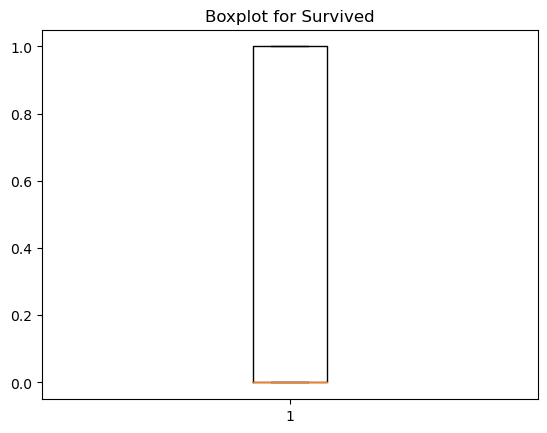

In [12]:
## Boxplot of column Survived
plt.boxplot(data['Survived'])
plt.title('Boxplot for Survived')
plt.show()

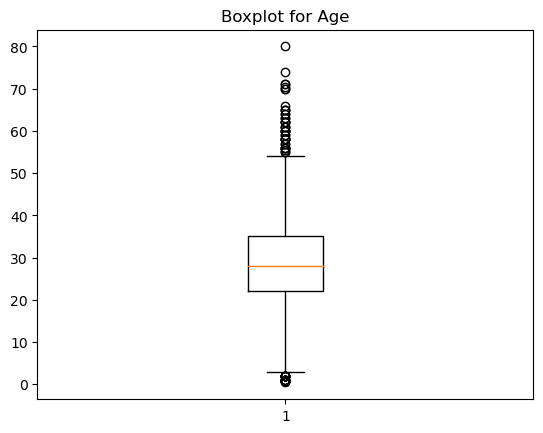

In [13]:
## Boxplot of column Age
plt.boxplot(data['Age'])
plt.title('Boxplot for Age')
plt.show()

In [14]:
## To find the IQR value and limits to handle outliers
Q1=np.percentile(data['Age'],25)
Q3=np.percentile(data['Age'],75)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
upr_limit=Q3+1.5*IQR

In [15]:
## To find the outliers
outlier=[]
for x in data['Age']:
    if x >upr_limit or x<low_limit:
        outlier.append(x)

In [16]:
## To find the index of above upper limit
ind=data['Age']>upr_limit
data.loc[ind].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [17]:
## To drop the outliers
data.drop([12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

In [18]:
## To find the index of below lower limit
ind=data['Age']<low_limit
data.loc[ind].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [19]:
## To drop the outliers
data.drop([8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],inplace=True)

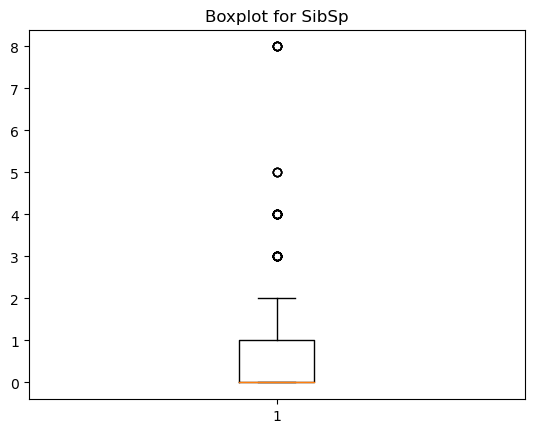

In [20]:
## Boxplot of column SibSp
plt.boxplot(data['SibSp'])
plt.title('Boxplot for SibSp')
plt.show()

In [21]:
## To find the IQR value and limits to handle outliers
Q1=np.percentile(data['SibSp'],25)
Q3=np.percentile(data['SibSp'],75)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
upr_limit=Q3+1.5*IQR

In [22]:
## To find the index of the outliers
data[data['SibSp']>upr_limit].index

Int64Index([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [23]:
## To find the index of the outliers
data[data['SibSp']<low_limit].index

Int64Index([], dtype='int64', name='PassengerId')

In [24]:
## To drop the outliers
data.drop([25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],inplace=True)

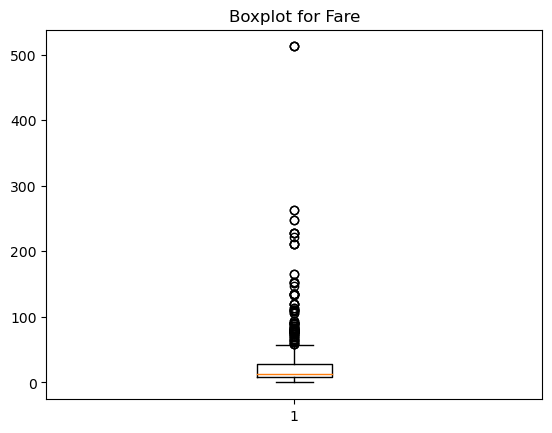

In [25]:
## Boxplot of column Fare
plt.boxplot(data['Fare'])
plt.title('Boxplot for Fare')
plt.show()

In [26]:
## To find the IQR value and limits to handle outliers
Q1=np.percentile(data['Fare'],25)
Q3=np.percentile(data['Fare'],75)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
upr_limit=Q3+1.5*IQR

In [30]:
## To find the index of the outliers
fare_ind=data[data['Fare']>upr_limit].index

In [31]:
## To drop the outliers in Fare column
data=data.drop(fare_ind)

In [32]:
## To find the index of the outliers
data[data['Fare']<low_limit].index

Int64Index([], dtype='int64', name='PassengerId')

## To do min max scaling on the feature set (Take ‘Survived’ as target)

In [49]:
## To load the dataset
data1=pd.read_csv(r'C:\Users\jinuv\Desktop\Python\Assignment4\titanic_dataset.csv')
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
## To fill missing values in column 'Age'
for i in ['Age']:
    data1[i]=data1[i].fillna(data1[i].median())

In [51]:
## To fill missing values in Embarked column
for i in ['Embarked']:
    data1[i]=data1[i].fillna(data1[i].mode()[0])

In [52]:
## To drop cabin column with more missing values
data1=data1.drop('Cabin',axis=1)

In [53]:
## To take Survived as target and to drop some columns
x=data1.drop(['Survived','PassengerId','Name','Ticket'],axis=1)
y=data1['Survived']

In [54]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [57]:
## To make categorical to numerical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['Sex']=le.fit_transform(x['Sex'])
x['Embarked']=le.fit_transform(x['Embarked'])

In [58]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [59]:
## To do minmax scaler
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)

In [60]:
x

array([[1.        , 1.        , 0.27117366, ..., 0.        , 0.01415106,
        1.        ],
       [0.        , 0.        , 0.4722292 , ..., 0.        , 0.13913574,
        0.        ],
       [1.        , 0.        , 0.32143755, ..., 0.        , 0.01546857,
        1.        ],
       ...,
       [1.        , 0.        , 0.34656949, ..., 0.33333333, 0.04577135,
        1.        ],
       [0.        , 1.        , 0.32143755, ..., 0.        , 0.0585561 ,
        0.        ],
       [1.        , 1.        , 0.39683338, ..., 0.        , 0.01512699,
        0.5       ]])

In [61]:
## To change array to Dataframe
x=pd.DataFrame(x)

In [62]:
x.describe()

,0,1,2,3,4,5,6
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.647587,0.363679,0.065376,0.063599,0.062858,0.768238
std,0.418036,0.477990,0.163605,0.137843,0.134343,0.096995,0.395752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.271174,0.000000,0.000000,0.015440,0.500000
50%,1.000000,1.000000,0.346569,0.000000,0.000000,0.028213,1.000000
75%,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
